In [194]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
%matplotlib inline


In [195]:
fname = './training.csv'
df = read_csv(os.path.expanduser(fname))  # data frame
df = df.dropna()
image_series = df["Image"].apply(lambda im: np.fromstring(im, dtype=np.int64, sep=" "))
df.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [199]:
image_series[2130]

KeyError: 2130

In [188]:
del(df["Image"])

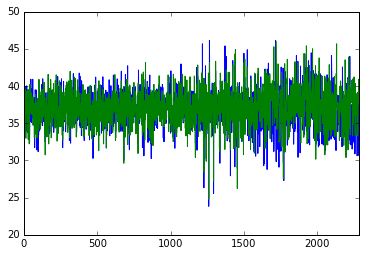

In [189]:
df["left_eye_center_y"].plot()
df["right_eye_center_y"].plot()

In [190]:
def convertXYColumns(x_list, y_list):
    result = np.zeros(2140)
    for i, x_elem in enumerate(x_list):
#         if x_elem == np.NaN or y_list[i] == np.NaN:
#             result[i] = np.NaN
#         else:
            result[i] = x_elem + y_list[i]*96 # the image is 96 by 96
    return result


left_eye_center = convertXYColumns(df["left_eye_center_x"].tolist(),df["left_eye_center_y"].tolist())
right_eye_center = convertXYColumns(df["right_eye_center_x"].tolist(),df["right_eye_center_y"].tolist())
left_eye_inner_corner  = convertXYColumns(df["left_eye_inner_corner_x"].tolist(),df["left_eye_inner_corner_y"].tolist())
left_eye_outer_corner = convertXYColumns(df["left_eye_outer_corner_x"].tolist(),df["left_eye_outer_corner_y"].tolist())
right_eye_inner_corner = convertXYColumns(df["right_eye_inner_corner_x"].tolist(),df["right_eye_inner_corner_y"].tolist())
right_eye_outer_corner = convertXYColumns(df["right_eye_outer_corner_x"].tolist(),df["right_eye_outer_corner_y"].tolist())
left_eyebrow_inner_end = convertXYColumns(df["left_eyebrow_inner_end_x"].tolist(),df["left_eyebrow_inner_end_y"].tolist())
left_eyebrow_outer_end = convertXYColumns(df["left_eyebrow_outer_end_x"].tolist(),df["left_eyebrow_outer_end_y"].tolist())
right_eyebrow_inner_end = convertXYColumns(df["right_eyebrow_inner_end_x"].tolist(),df["right_eyebrow_inner_end_y"].tolist())
right_eyebrow_outer_end = convertXYColumns(df["right_eyebrow_outer_end_x"].tolist(),df["right_eyebrow_outer_end_y"].tolist())
nose_tip = convertXYColumns(df["nose_tip_x"].tolist(),df["nose_tip_y"].tolist())
mouth_left_corner = convertXYColumns(df["mouth_left_corner_x"].tolist(),df["mouth_left_corner_y"].tolist())
mouth_right_corner = convertXYColumns(df["mouth_right_corner_x"].tolist(),df["mouth_right_corner_y"].tolist())
mouth_center_top_lip = convertXYColumns(df["mouth_center_top_lip_x"].tolist(),df["mouth_center_top_lip_y"].tolist())
mouth_center_bottom_lip = convertXYColumns(df["mouth_center_bottom_lip_x"].tolist(),df["mouth_center_bottom_lip_y"].tolist())


data_array = np.array([left_eye_center, right_eye_center, 
                       left_eye_inner_corner, left_eye_outer_corner, 
                       right_eye_inner_corner, right_eye_outer_corner, 
                       left_eyebrow_inner_end, left_eyebrow_outer_end, 
                       right_eyebrow_inner_end, right_eyebrow_outer_end, 
                       nose_tip, mouth_left_corner, mouth_right_corner, 
                       mouth_center_top_lip, mouth_center_bottom_lip])
data_array = data_array.T

header = ["left_eye_center", "right_eye_center", 
          "left_eye_inner_corner", "left_eye_outer_corner", 
          "right_eye_inner_corner", "right_eye_outer_corner", 
          "left_eyebrow_inner_end", "left_eyebrow_outer_end", 
          "right_eyebrow_inner_end", "right_eyebrow_outer_end", 
          "nose_tip", "mouth_left_corner", "mouth_right_corner", 
          "mouth_center_top_lip", "mouth_center_bottom_lip", "image_series", "cluster_id"]

# import csv

# with open('file_test.csv', 'wb') as outcsv:
#     writer = csv.writer(outcsv)
#     writer.writerow(header)

# np.savetxt("file_name.csv", data_array, delimiter=",")




In [191]:
from sklearn.cluster import KMeans

cluster_value = KMeans(n_clusters=4).fit_predict(data_array)
cluster_value.shape

# df['cluster_id']=cluster_value
# df['cluster_id'].value_counts()


clusterinfo = pd.DataFrame()
clusterinfo["left_eye_center"]=left_eye_center
clusterinfo["right_eye_center"]= right_eye_center
clusterinfo["left_eye_inner_corner"]=left_eye_inner_corner
clusterinfo["left_eye_outer_corner"]=left_eye_outer_corner 
clusterinfo["right_eye_inner_corner"]=right_eye_inner_corner
clusterinfo["right_eye_outer_corner"]=right_eye_outer_corner
clusterinfo["left_eyebrow_inner_end"]=left_eyebrow_inner_end
clusterinfo["left_eyebrow_outer_end"]=left_eyebrow_outer_end 
clusterinfo["right_eyebrow_inner_end"]=right_eyebrow_inner_end
clusterinfo["right_eyebrow_outer_end"]=right_eyebrow_outer_end
clusterinfo["nose_tip"]=nose_tip
clusterinfo["mouth_left_corner"]=mouth_left_corner
clusterinfo["mouth_right_corner"]=mouth_right_corner
clusterinfo["mouth_center_top_lip"]=mouth_center_top_lip
clusterinfo["mouth_center_bottom_lip"]=mouth_center_bottom_lip
clusterinfo["Image"] = image_series
clusterinfo["cluster_id"]=cluster_value

clusterinfo.to_csv("test.csv", header=header)

In [192]:
df_test = read_csv(os.path.expanduser("test.csv"),index_col=0)  # data frame
df_test

,left_eye_center,right_eye_center,left_eye_inner_corner,left_eye_outer_corner,right_eye_inner_corner,right_eye_outer_corner,left_eyebrow_inner_end,left_eyebrow_outer_end,right_eyebrow_inner_end,right_eyebrow_outer_end,nose_tip,mouth_left_corner,mouth_right_corner,mouth_center_top_lip,mouth_center_bottom_lip,image_series,cluster_id
0,3810.251838,3526.708114,3865.734641,3910.250057,3625.739116,3612.835417,2844.183483,3174.128409,2824.450502,2862.513564,5522.833660,7738.331188,7457.957774,7045.116632,8153.765053,"[238 236 237 ..., 70 75 90]",1
1,3421.460289,3241.025906,3445.193668,3544.690655,3334.741787,3206.338996,2768.478502,2997.602860,2552.748936,2614.515881,5391.656170,7386.213447,7335.697702,6792.273702,8251.564255,"[219 215 204 ..., 1 1 1]",1
2,3416.382695,3382.229432,3546.224968,3557.797389,3524.491074,3538.885642,2702.553474,3213.442989,2743.197347,3097.154274,5187.296211,7070.197263,7015.998316,6785.686737,7598.574316,"[144 142 159 ..., 78 78 77]",2
3,3642.356035,3609.153391,3816.212536,3756.887541,3758.013663,3674.065920,3025.700786,3117.819882,3022.470511,2891.754908,5251.872835,7045.156174,7160.011409,6779.105113,7565.325913,"[193 192 193 ..., 1 1 1]",3
4,3870.366390,3684.279872,3862.206979,3901.424687,3790.088128,3699.808844,3001.778533,3124.538621,3007.832069,2960.454832,6272.693595,7502.902380,7422.932613,7120.871853,8383.859043,"[147 148 160 ..., 140 170 176]",1
5,3906.680523,3635.266542,3919.114318,4029.399477,3815.693159,3724.056673,3098.290093,3477.687028,2971.861682,3101.361645,5697.268486,7982.102131,7872.222505,7584.120224,9063.713944,"[167 169 170 ..., 78 86 95]",0
6,3355.975732,3210.830819,3432.585020,3360.870443,3271.309530,3205.360107,2659.428725,2870.528859,2641.000591,2675.564456,5135.447839,6830.593289,6781.061799,6294.689074,7538.889664,"[109 109 125 ..., 117 108 103]",2
7,3851.160326,3833.040746,3943.213142,3919.263099,3921.136404,3864.696885,2680.068816,3088.067790,2623.837142,3075.778951,5511.056155,7749.319456,7832.606913,6890.845981,8790.653359,"[178 177 178 ..., 100 72 74]",0
8,3402.302080,3501.293440,3642.263040,3519.306880,3592.489600,3631.399680,2460.426240,2828.160640,2549.115520,3019.885440,5361.523840,7108.875520,7211.809920,6543.421440,8026.439040,"[164 158 118 ..., 85 102 138]",2
9,3591.190769,3714.923692,3691.320000,3651.144492,3827.428923,3866.767385,2791.984492,2916.566400,2850.836923,3279.872615,5265.782769,6708.262769,6965.682462,6533.376000,7431.324923,"[226 227 225 ..., 118 114 113]",2


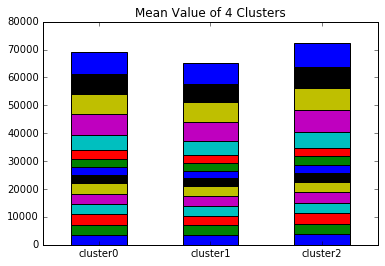

In [102]:
df = pd.DataFrame()

for i in range(3):
    df['cluster' + str(i)] = clusterinfo[clusterinfo['cluster_id'] == i].mean()


df= df.drop('cluster_id')

my_plot = df.T.plot(kind='bar',legend=False, stacked=True, title="Mean Value of 4 Clusters")

my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)